In [ ]:
!pip install qiskit==0.46 qiskit-ibmq-provider pylatexenc qiskit-aer

In [ ]:
from qiskit import IBMQ
MY_API_TOKEN = '743a2e92feeae792763aa4ca74bbce26aae5058badf2edf21de7733d116ed93d25e688a5f248c31c4eadab31a1dd25e2e73e8bd52e1541e1331560b7ab93ed8a'
IBMQ.save_account(MY_API_TOKEN, overwrite=True)

# **Лабораторная работа №4**

**СУММАТОР В КВАНТОВЫХ СХЕМАХ**

Цель работы: ознакомление с выполнением простого сложения с помощью квантовых схем.


**Теория**

Как и в классических вычислениях, где вы можете комбинировать различные логические элементы (например, И, ИЛИ, исключающее ИЛИ и т. д.) для создания двоичных сумматоров, вы также можете создавать сумматоры с помощью квантовых схем.


# Задание
1. Изучить теоретический материал.
2. Произвести регистрацию на сайте https://quantum.ibm.com/ для получения токена API или дальнейшей работы с интерактивной средой IBM Quantum Experience
3. Средствами Qiskit или используя средства интерактивной среды IBM Quantum Experience https://quantum.ibm.com/composer/ , создать квантовую схему полного сумматора.

Полный сумматор принимает на вход два двоичных числа плюс бит переполнения, который мы назовем X.
Создайте полный сумматор с входными данными:

$A=1$, $B=0$, $X=1$
.

Таблица истинности для полного сумматора приведена ниже.

|A(input)|B(input)|X(carry input)|S(sum)|C(carry out)|
|--|--|--|--|--|
|0|0|0|0|0|
|0|0|1|1|0|
|0|1|0|1|0|
|0|1|1|0|1|
|1|0|0|1|0|
|1|0|1|0|1|
|1|1|0|0|1|
|1|1|1|1|1|

<ipython-input-20-72c8d2ead987>:19: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  backend = Aer.get_backend('qasm_simulator')
<ipython-input-20-72c8d2ead987>:20: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit, backend, shots=1000)
/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_rati

{'0000': 1000}


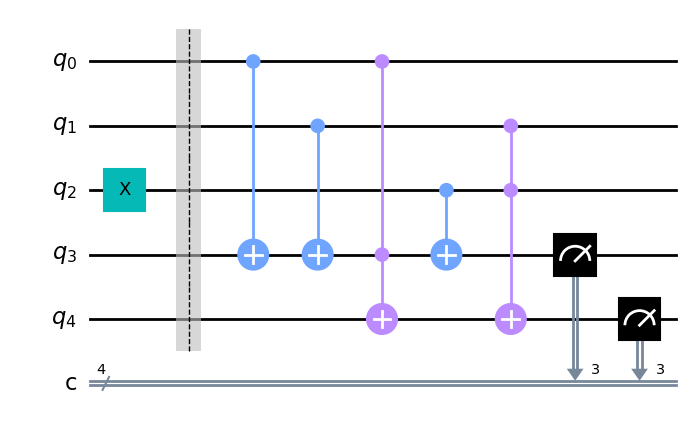

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[2])
circuit.barrier(qreg_q)
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.ccx(qreg_q[0], qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[4])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[3])

backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)

circuit.draw(output='mpl')

# **Лабораторная работа №5**

**Алгоритм Гровера**

Цель работы: ознакомление с алгоритмом Гровера и его реализацией в квантовых системах.



Возможно, вы слышали, что одним из преимуществ квантового компьютера перед классическим является его превосходная скорость поиска в базах данных.<br/>
Алгоритм Гровера демонстрирует эту возможность. Этот алгоритм может квадратично ускорить задачу неструктурированного поиска (классические вычисления требуют порядка $N$ шагов для поиска $N$ записей, в то время как квантовый компьютер требует всего лишь $\sqrt{N}$), но его возможности распространяются и за грань этого; он может служить подпрограммой для получения квадратичного улучшения времени выполнения для множества других алгоритмов. Это называется трюком с усилением амплитуды.

Вы познакомитесь с описанием проблемы поиска, построением оракула — схематического представления нашей задачи поиска и реализацией полного алгоритма Гровера в Qiskit.

# Задание
Найдите количество итераций с наибольшей амплитудой при запуске алгоритма Гровера с одним решением в базе данных с $N = 2^7$. Как показано выше, измените количество итераций и проверьте усиление. Ответ должен быть целым числом.

Подсказка: менее 15 раз.

<ipython-input-21-fd67247f03ca>:2: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import BasicAer, execute
<ipython-input-21-fd67247f03ca>:37: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, backend=backend, shots=1000, seed_simulator=12345, backend_options={"fusion_enable":True})
/usr/local/lib/python3.10/dist-packages/qiskit/execute_function.

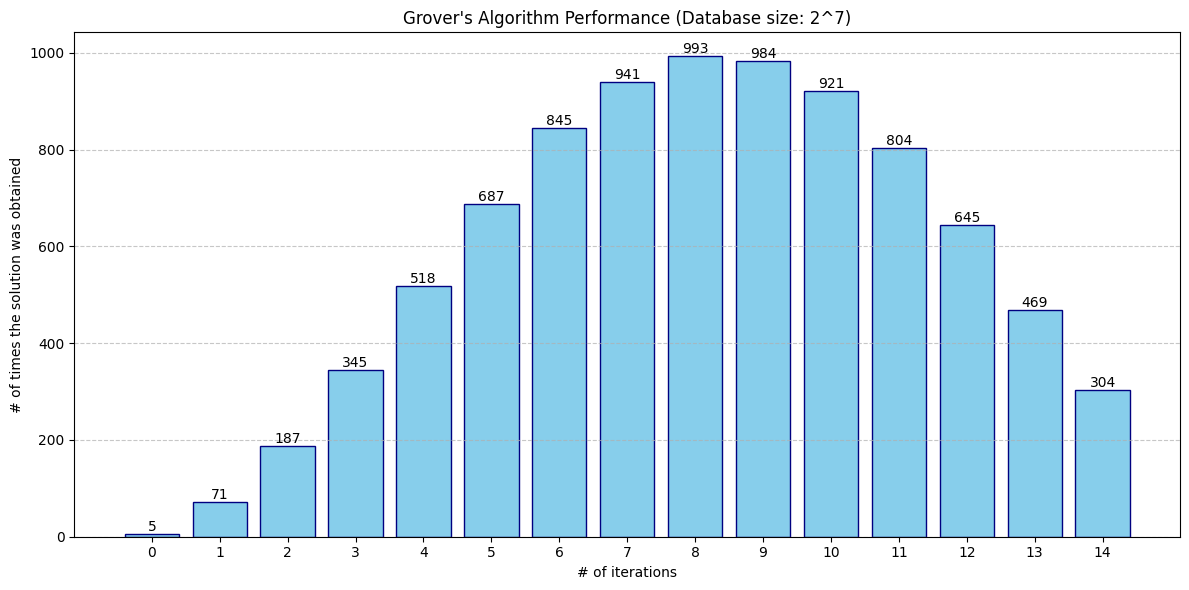

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer, execute
import numpy as np
import matplotlib.pyplot as plt

backend = BasicAer.get_backend('qasm_simulator')
prob_of_ans = []

for x in range(15):
    database = QuantumRegister(7)
    oracle = QuantumRegister(1)
    auxiliary = QuantumRegister(6)
    cr = ClassicalRegister(7)
    qc = QuantumCircuit(database, oracle, auxiliary, cr)

    qc.h(database[:])
    qc.x(oracle[0])
    qc.h(oracle[0])

    for j in range(x):
        qc.mct(database[:], oracle[0], auxiliary[:], mode='basic')

        qc.h(database[:])
        qc.x(database[:])
        qc.h(database[6])
        qc.mct(database[0:6], database[6], auxiliary[:], mode='basic')
        qc.h(database[6])
        qc.x(database[:])
        qc.h(database[:])

    qc.h(oracle[0])
    qc.x(oracle[0])
    qc.measure(database, cr)

    qc = qc.reverse_bits()

    job = execute(qc, backend=backend, shots=1000, seed_simulator=12345, backend_options={"fusion_enable":True})
    result = job.result()
    count = result.get_counts()
    answer = count.get('1111111', 0)
    prob_of_ans.append(answer)

iteration = list(range(15))
correct = prob_of_ans

plt.figure(figsize=(12, 6))
plt.bar(iteration, correct, color='skyblue', edgecolor='navy')
plt.xlabel('# of iterations')
plt.ylabel('# of times the solution was obtained')
plt.title("Grover's Algorithm Performance (Database size: 2^7)")
plt.xticks(iteration)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(correct):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()